<a href="https://colab.research.google.com/github/zhirongwang94/AI-Colorization/blob/master/Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the right codes for image colorization. (source and credit: https://www.instructables.com/id/Colorizing-Old-BW-Photos-and-Videos-With-the-Help-/)**

Downloat models for the colorization 

In [ ]:
! mkdir model 
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel -O ./model/colorization_release_v2.caffemodel
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel -O ./model/colorization_release_v2_norebal.caffemodel
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel -O ./model/colorization_release_v1.caffemodel

Clone the finished repository to compare the content 

In [ ]:
! git clone https://github.com/zhirongwang94/AI-Colorization.git

In [28]:
! cp ./AI-Colorization/model/colorization_deploy_v2.prototxt ./model/colorization_deploy_v2.prototxt
! cp ./AI-Colorization/model/pts_in_hull.npy ./model/pts_in_hull.npy 

# Black and White Phote Colorization

1. Import important libraries 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

2. Define image to be colorized:

In [48]:
IMAGE = "soldiers_1941.jpg"

3. Define Model Paths:

In [49]:
prototxt = "./model/colorization_deploy_v2.prototxt"
model = "./model/colorization_release_v2.caffemodel"
points = "./model/pts_in_hull.npy"
image =  "./input_images/"+IMAGE

4. Load serialized black and white colorizer model and cluster: (you need to have pts_in_hull.npy and colorization_deploy_v2.prototxt files in model dirctory to continue)

In [50]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)
pts = np.load(points)

5. Add the cluster centers as 1x1 convolutions to the model:

In [51]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

6. Load the input image, scale it and convert it to Lab:(if error occurs here, check if the IMAGE has the jpg extention )

In [52]:
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

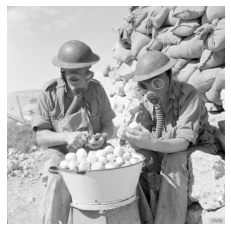

In [53]:
plt.imshow(image)
plt.axis('off');

7. Extracting "L":

In [56]:
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

8. Predicting "a" and "b":

In [55]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

9. Creating a colorized Lab photo (L + a + b):

In [57]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


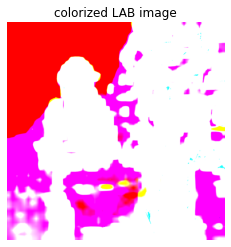

In [58]:
plt.imshow(colorized)
plt.axis('off');
plt.title('colorized LAB image');

10. Converting to RGB:

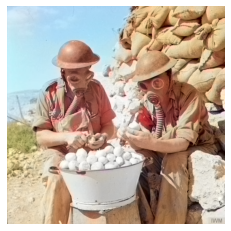

In [59]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized)
plt.axis('off');

11. Saving the final RGB photo:

In [60]:
cv2.imwrite("./colorized_images/Color_"+IMAGE, cv2.cvtColor(colorized, cv2.COLOR_RGB2BGR))

True